<a href="https://colab.research.google.com/github/EronDS/Neural-Networks/blob/main/CNNs/Images/Bees_PollenVerifier/Pollen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import os 
import numpy as np 
import keras
from PIL import Image
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,Flatten, Activation , Dropout, MaxPool2D
from keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model , to_categorical
from keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Bee_Polen/PollenDataset/PollenDataset/pollen_data.csv')
df.drop('Unnamed: 0' , axis = 1, inplace = True)
df

,filename,pollen_carrying
0,P10057-125r.jpg,1
1,P57380-120r.jpg,1
2,NP63671-221r.jpg,0
3,NP53776-47r.jpg,0
4,NP13382-201r.jpg,0
...,...,...
709,NP64239-233r.jpg,0
710,NP10304-132r.jpg,0
711,NP28671-238r.jpg,0
712,P14163-218r.jpg,1


In [3]:
df

,filename,pollen_carrying
0,P10057-125r.jpg,1
1,P57380-120r.jpg,1
2,NP63671-221r.jpg,0
3,NP53776-47r.jpg,0
4,NP13382-201r.jpg,0
...,...,...
709,NP64239-233r.jpg,0
710,NP10304-132r.jpg,0
711,NP28671-238r.jpg,0
712,P14163-218r.jpg,1


In [4]:
imgs_unique = [] 
for i in df.filename:
  imgs_unique.append(i)

In [5]:
imgs_dir = [] 
for i in imgs_unique:
  imgs_dir.append('/content/drive/MyDrive/Datasets/Bee_Polen/PollenDataset/images/{}'.format(i))

In [6]:
label = df.pollen_carrying
polen = []
idxNO = []
idxW = []
count = 0
for i in label:
  if i == 0:
    polen.append('Sem Pólen')
    idxNO.append(count)
  if i == 1:
    polen.append('Carregando Pólen')
    idxW.append(count)
  count += 1



In [7]:
df['label'] = polen
df

,filename,pollen_carrying,label
0,P10057-125r.jpg,1,Carregando Pólen
1,P57380-120r.jpg,1,Carregando Pólen
2,NP63671-221r.jpg,0,Sem Pólen
3,NP53776-47r.jpg,0,Sem Pólen
4,NP13382-201r.jpg,0,Sem Pólen
...,...,...,...
709,NP64239-233r.jpg,0,Sem Pólen
710,NP10304-132r.jpg,0,Sem Pólen
711,NP28671-238r.jpg,0,Sem Pólen
712,P14163-218r.jpg,1,Carregando Pólen


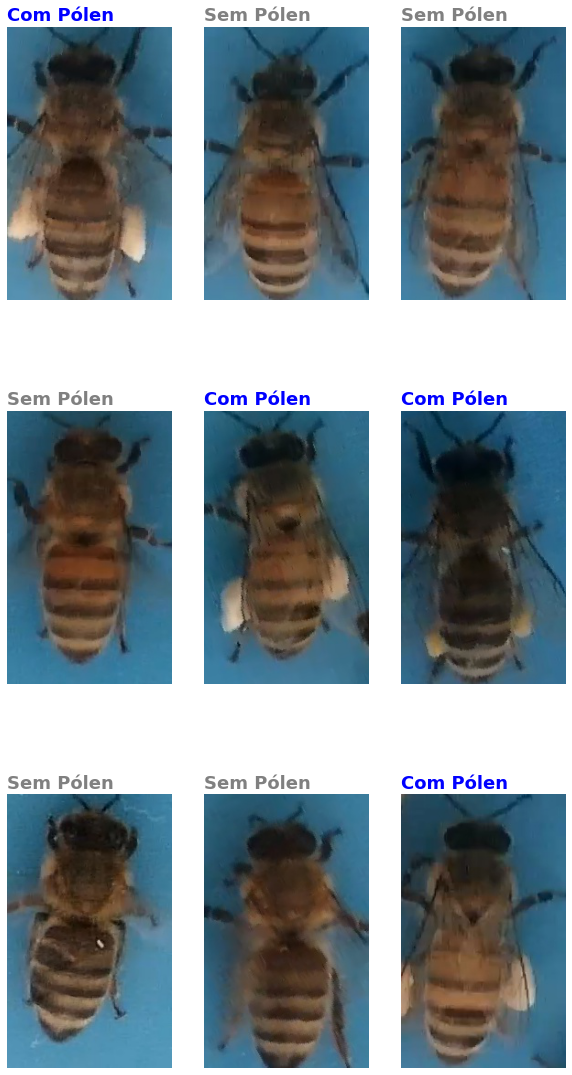

In [58]:
plt.figure(figsize=(10, 20))

for i in range(1 , 10):
    plt.subplot(3, 3, i )
    plt.imshow(Image.open(imgs_dir[i]))
    if label[i] == 0:
      plt.title('Sem Pólen' , color = 'grey' , loc = 'left', weight = 'bold' , fontsize = 18)
    if label[i] == 1:
      plt.title('Com Pólen' , color = 'blue' , loc = 'left' , weight = 'bold' , fontsize = 18)
    plt.axis('off')
plt.savefig('bees.png')
plt.show()

In [9]:
(np.asarray(Image.open(imgs_dir[0]))).shape

(300, 180, 3)

In [10]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
train_generator = datagen.flow_from_dataframe(dataframe = df,
                                              directory = '/content/drive/MyDrive/Datasets/Bee_Polen/PollenDataset/PollenDataset/images/',
                                              x_col = 'filename',
                                              y_col = 'label',
                                              validation_split = .15,
                                              batch_size = 32,
                                              class_mode = 'binary', 
                                              target_size = (60,26))

Found 714 validated image filenames belonging to 2 classes.


In [11]:
model = Sequential()
model.add(Conv2D(64,2, padding = 'same', 
                 input_shape = (60,26,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, 2 , strides = 1, padding  = 'same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(.33))
model.add(Dense(1, activation= 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 26, 64)        832       
_________________________________________________________________
activation (Activation)      (None, 60, 26, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 26, 32)        8224      
_________________________________________________________________
activation_1 (Activation)    (None, 60, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12480)             0

In [13]:
steps = train_generator.n // train_generator.batch_size

model.compile(optimizer =RMSprop(learning_rate = 1e-3), loss = 'binary_crossentropy', metrics = ['acc'])

history1 = model.fit_generator(generator = train_generator,
                    steps_per_epoch = steps, epochs = 5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
22/22 [==============================] - 16s 66ms/step - loss: 1.0310 - acc: 0.5564
Epoch 2/5
22/22 [==============================] - 1s 67ms/step - loss: 0.5665 - acc: 0.7066
Epoch 3/5
22/22 [==============================] - 1s 67ms/step - loss: 0.4321 - acc: 0.8029
Epoch 4/5
22/22 [==============================] - 2s 68ms/step - loss: 0.3554 - acc: 0.8532
Epoch 5/5
22/22 [==============================] - 1s 68ms/step - loss: 0.3231 - acc: 0.8714


### Avoiding Overfitting

In [14]:
x_train , x_test , y_train , y_test = train_test_split(df['filename'], df['label'] , test_size = .2)

In [15]:
train_df = pd.DataFrame()
train_df['filename'] = x_train 
train_df['label'] = y_train
train_df

,filename,label
252,NP12063-167r.jpg,Sem Pólen
0,P10057-125r.jpg,Carregando Pólen
673,NP52328-19r.jpg,Sem Pólen
442,NP13122-195r.jpg,Sem Pólen
3,NP53776-47r.jpg,Sem Pólen
...,...,...
70,NP64976-239r.jpg,Sem Pólen
229,P57555-126r.jpg,Carregando Pólen
666,NP13169-197r.jpg,Sem Pólen
288,P27101-196r.jpg,Carregando Pólen


In [16]:
test_df = pd.DataFrame()
test_df['filename'] = x_test
test_df['label'] = y_test
test_df

,filename,label
581,NP9603-118r.jpg,Sem Pólen
34,NP26910-194r.jpg,Sem Pólen
702,NP55089-85r.jpg,Sem Pólen
331,P22897-109r.jpg,Carregando Pólen
235,NP19884-38r.jpg,Sem Pólen
...,...,...
517,NP16527-255r.jpg,Sem Pólen
84,P53341-40r.jpg,Carregando Pólen
119,P21541-69r.jpg,Carregando Pólen
474,NP28480-230r.jpg,Sem Pólen


In [17]:
x_test,x_val,y_test,y_val = train_test_split(test_df['filename'] , test_df['label'], test_size = .5)

In [18]:
test_df = pd.DataFrame()
test_df['filename'] = x_test
test_df['label'] = y_test
test_df

,filename,label
356,P57883-136r.jpg,Carregando Pólen
44,NP1768-12r.jpg,Sem Pólen
474,NP28480-230r.jpg,Sem Pólen
171,P54657-76r.jpg,Carregando Pólen
464,NP26791-190r.jpg,Sem Pólen
...,...,...
264,NP16546-257r.jpg,Sem Pólen
582,P52239-10r.jpg,Carregando Pólen
109,NP3641-20r.jpg,Sem Pólen
657,NP22897-110r.jpg,Sem Pólen


In [19]:
val_df = pd.DataFrame()
val_df['filename'] = x_val
val_df['label'] = y_val
val_df


,filename,label
56,P65467-246r.jpg,Carregando Pólen
511,P18278-0r.jpg,Carregando Pólen
502,NP29121-248r.jpg,Sem Pólen
119,P21541-69r.jpg,Carregando Pólen
284,NP9897-122r.jpg,Sem Pólen
...,...,...
243,NP65528-249r.jpg,Sem Pólen
362,P22324-86r.jpg,Carregando Pólen
551,P24191-129r.jpg,Carregando Pólen
581,NP9603-118r.jpg,Sem Pólen


In [20]:
datagen=ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_dataframe(dataframe = train_df,
                                              directory = '/content/drive/MyDrive/Datasets/Bee_Polen/PollenDataset/PollenDataset/images/',
                                              x_col = 'filename',
                                              y_col = 'label',
                                              batch_size = 32,
                                              class_mode = 'binary', 
                                              target_size = (60,26))

val_generator = datagen.flow_from_dataframe(dataframe = val_df,
                                              directory = '/content/drive/MyDrive/Datasets/Bee_Polen/PollenDataset/PollenDataset/images/',
                                              x_col = 'filename',
                                              y_col = 'label',
                                              batch_size = 32,
                                              class_mode = 'binary', 
                                              target_size = (60,26))
test_generator = datagen.flow_from_dataframe(dataframe = test_df,
                                              directory = '/content/drive/MyDrive/Datasets/Bee_Polen/PollenDataset/PollenDataset/images/',
                                              x_col = 'filename',
                                              y_col = 'label',
                                              batch_size = 32,
                                              class_mode = 'binary', 
                                              target_size = (60,26))

Found 571 validated image filenames belonging to 2 classes.
Found 72 validated image filenames belonging to 2 classes.
Found 71 validated image filenames belonging to 2 classes.


In [38]:
model2 = Sequential()
model2.add(Conv2D(64,2, padding = 'same', 
                 input_shape = (60,26,3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, 2 , strides = 1, padding  = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(.25))



model2.add(Flatten())
model.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(.33))
model2.add(Dense(1, activation= 'sigmoid'))

In [39]:
model2.compile(optimizer =RMSprop(learning_rate = 1e-3), loss = 'binary_crossentropy', metrics = ['acc'])
step_train = train_generator.n // train_generator.batch_size
val_test = val_generator.n // val_generator.batch_size
history2 = model2.fit_generator(generator = train_generator,
                     steps_per_epoch = step_train,
                     validation_data = val_generator,
                     validation_steps = val_test, epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
17/17 [==============================] - 3s 101ms/step - loss: 0.6879 - acc: 0.6114 - val_loss: 0.6217 - val_acc: 0.7500
Epoch 2/10
17/17 [==============================] - 1s 78ms/step - loss: 0.5952 - acc: 0.7441 - val_loss: 0.4858 - val_acc: 0.8281
Epoch 3/10
17/17 [==============================] - 1s 78ms/step - loss: 0.4759 - acc: 0.8179 - val_loss: 0.3973 - val_acc: 0.8438
Epoch 4/10
17/17 [==============================] - 1s 79ms/step - loss: 0.4333 - acc: 0.8416 - val_loss: 0.3767 - val_acc: 0.8438
Epoch 5/10
17/17 [==============================] - 1s 79ms/step - loss: 0.4100 - acc: 0.8291 - val_loss: 0.4158 - val_acc: 0.7969
Epoch 6/10
17/17 [==============================] - 1s 78ms/step - loss: 0.3662 - acc: 0.8524 - val_loss: 0.4217 - val_acc: 0.7969
Epoch 7/10
17/17 [==============================] - 1s 79ms/step - loss: 0.3215 - acc: 0.8629 - val_loss: 0.3522 - val_acc: 0.8594
Epoch 8/10
17/17 [==============================] - 1s 78ms/step - loss: 0.3073 - 

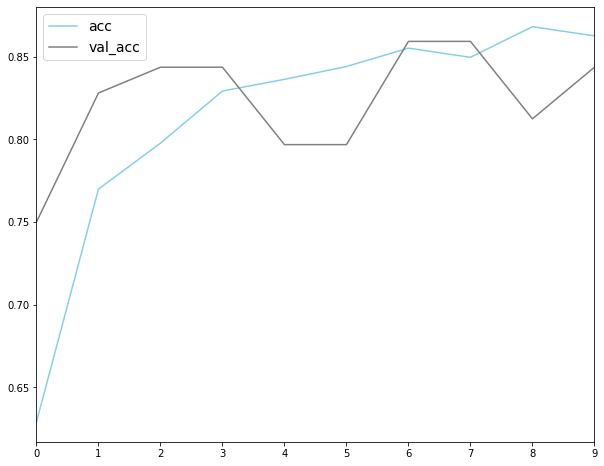

In [63]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

plt.figure(figsize = (10,8))
plt.plot(range(0,10) , acc , label= 'acc' , color = 'skyblue')
plt.xlim(0,9)
plt.plot(val_acc, label = 'val_acc' , color = 'grey')
plt.legend(fontsize = 14)
plt.show()

In [40]:
step_test = test_generator.n // test_generator.batch_size

res = model2.evaluate(test_generator)
print('Accuracy:{}'.format(res[1]))


3/3 [==============================] - 0s 41ms/step - loss: 0.3166 - acc: 0.9155
Accuracy:0.9154929518699646


In [41]:
preds = np.squeeze(model2.predict_generator(test_generator) >= 0.5).astype(np.int)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [42]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [43]:
preds == 0

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False])

In [44]:
train_generator.class_indices

{'Carregando Pólen': 0, 'Sem Pólen': 1}

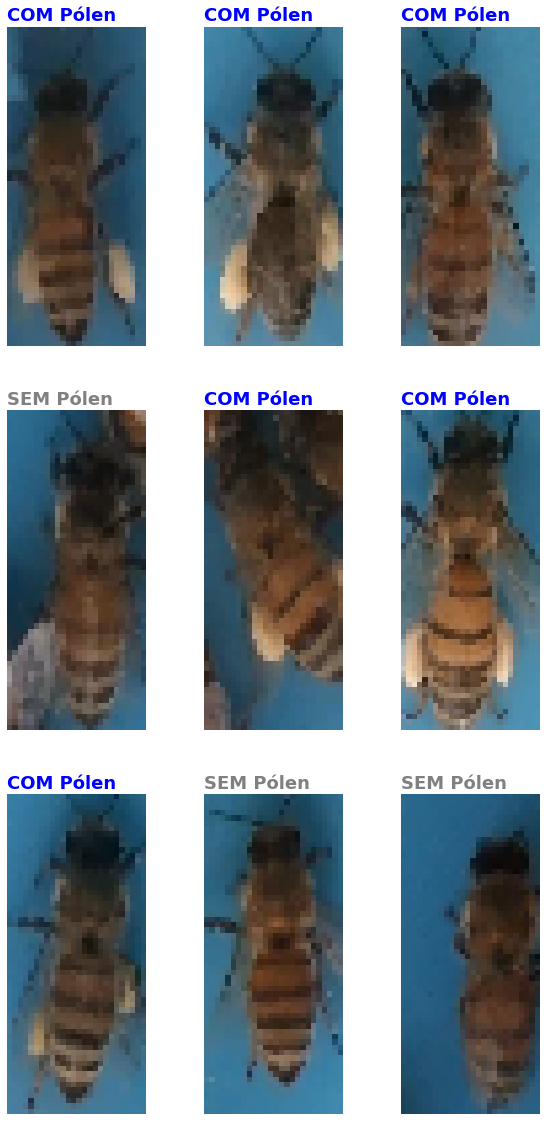

In [57]:
plt.figure(figsize=(10, 20))

for i in range(1 , 10):
    plt.subplot(3, 3, i )
    plt.imshow(test_generator[0][0][i])
    if preds[i] == 0:
      plt.title('COM Pólen' , color = 'blue' , loc = 'left', weight = 'bold' , fontsize = 18)
    if preds[i] == 1:
      plt.title('SEM Pólen' , color = 'grey' , loc = 'left' , weight = 'bold' , fontsize = 18)
    plt.axis('off')

plt.savefig('robot.png')
plt.show()

In [46]:
#model2.save('bee2.h5')